# Exploratory Data Analysis Notes

In [59]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as smf
# import statsmodels.formula.api as sm

## Importing data
This dataset contains information about employees at a company.

In [60]:
df = pd.read_csv('salary_data.csv')
df

,YearsExperience,Age,Badge,RaisePercent,ParkingSpot,SalarySchedule,Salary
0,1.1,24,83900,6,N,A,39343
1,1.3,32,19617,2,Y,A,46205
2,1.5,23,41582,8,Y,A,37731
3,2.0,25,76207,4,Y,A,43525
4,2.2,30,28610,7,Y,A,39891
5,2.9,28,45205,2,N,B,56642
6,3.0,28,10657,2,Y,B,60150
7,3.2,30,13355,5,N,A,54445
8,3.2,33,59715,2,N,C,64445
9,3.7,30,88944,1,N,B,57189


This data has already been cleaned so we can move to EDA.

## EDA
For this dataset we are interested in determining which features have the largest impact on salary. Before we can build our model, it's best to use exploratory data analysis to quantify these factors.

### Continuous numerical variables

When doing exploratory data analysis, we generally need to analyze continuous numerical variables differently from discrete categorical variables. In this dataset we have 4 continuous numerical features which could have an impact on salary:
- `YearsExperience`: Number of years they have worked at the company
- `Age`: Employee age
- `Badge`: Employee badge number
- `RaisePercent`: Raise in percent they will earn this year

#### Checking the Pearson correlation coefficient between variables
The **Pearson correlation coefficient** quantifies the linear relationship between two variables. This can be a good indication that certain features may be strong predictors of one another.

In [61]:
n_df = df.select_dtypes(include=['int', 'float'])
n_df.corr()

,YearsExperience,Age,Badge,RaisePercent,Salary
YearsExperience,1.000000,0.761266,0.176248,0.103924,0.978242
Age,0.761266,1.000000,0.310961,0.121935,0.743647
Badge,0.176248,0.310961,1.000000,0.080401,0.185653
RaisePercent,0.103924,0.121935,0.080401,1.000000,0.054885
Salary,0.978242,0.743647,0.185653,0.054885,1.000000


Since `YearExperience` has a very high correlation coefficient with `Salary` and `RaisePercent` has a moderately high correlation coefficient these two look like our best bet. They have a strong **linear relationship** with `Salary`. 

#### Finding the p-value of the Pearson correlation coefficient between variables

The **p-value** is the probability value that the correlation between these two variables is statistically significant. 

Since we are using a significance level of 0.05, if
- the p-value is $< 0.001$: we say there is strong evidence that the correlation is significant
- the p-value is $< 0.05$: there is moderate evidence that the correlation is significant
- the p-value is $< 0.1$: there is weak evidence that the correlation is significant
- the p-value is $> 0.1$: there is no evidence that the correlation is significant


In [62]:
pearson_coef, p_value = stats.pearsonr(df['YearsExperience'], df['Salary'])
print("The Pearson correlation coefficient is", pearson_coef, " with a p-value of P =", p_value, " for YearsExperience")  

pearson_coef, p_value = stats.pearsonr(df['Age'], df['Salary'])
print("The Pearson correlation coefficient is", pearson_coef, " with a p-value of P =", p_value, " for Age")  

pearson_coef, p_value = stats.pearsonr(df['Badge'], df['Salary'])
print("The Pearson correlation coefficient is", pearson_coef, " with a p-value of P =", p_value, " for Badge")

pearson_coef, p_value = stats.pearsonr(df['RaisePercent'], df['Salary'])
print("The Pearson correlation coefficient is", pearson_coef, " with a p-value of P =", p_value, " for RaisePercent")  


The Pearson correlation coefficient is 0.9782416184887599  with a p-value of P = 1.1430681092271567e-20  for YearsExperience
The Pearson correlation coefficient is 0.7436465777582963  with a p-value of P = 2.490225296274818e-06  for Age
The Pearson correlation coefficient is 0.18565295779096858  with a p-value of P = 0.3259870984137714  for Badge
The Pearson correlation coefficient is 0.05488490040456148  with a p-value of P = 0.7733005068361025  for RaisePercent


Let's look at these relationships visually with **regression plots** and **residual plots** to see if we can identify patterns.

#### YearsExperience vs Salary

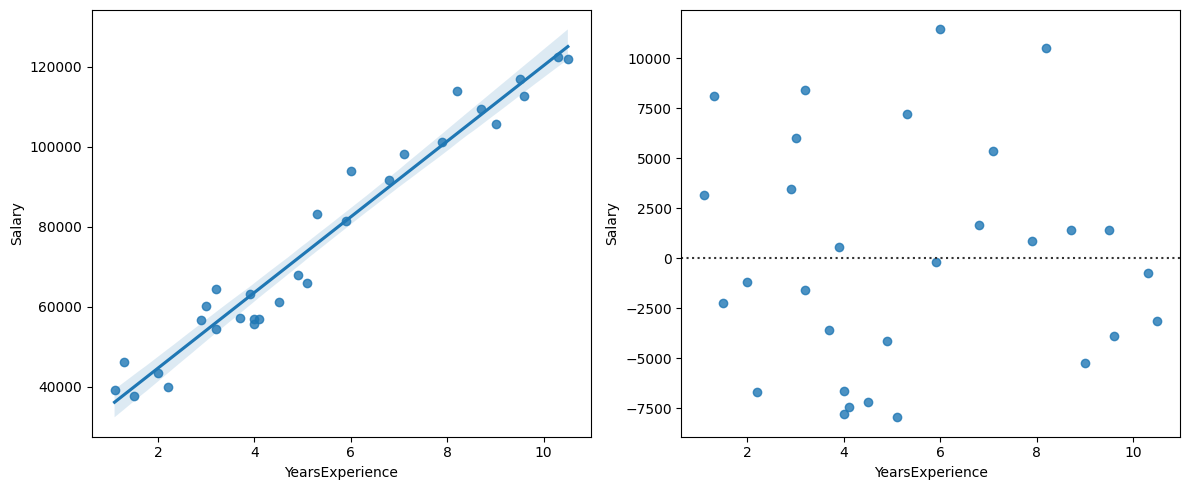

In [63]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.regplot(x=df['YearsExperience'], y=df['Salary'])
plt.subplot(122)
sns.residplot(x=df['YearsExperience'], y=df['Salary'])

plt.tight_layout()  # Adjust subplot parameters to remove extra space
plt.show()


This relationship looks pretty strong. The data points are very close to the regression line and the residuals are pretty equally spread out looking at our plot. This confirms what we know from the correlation coefficient(since it is so close to 1) that these two columns likely have a strong positive correlation. 

#### Age vs Salary

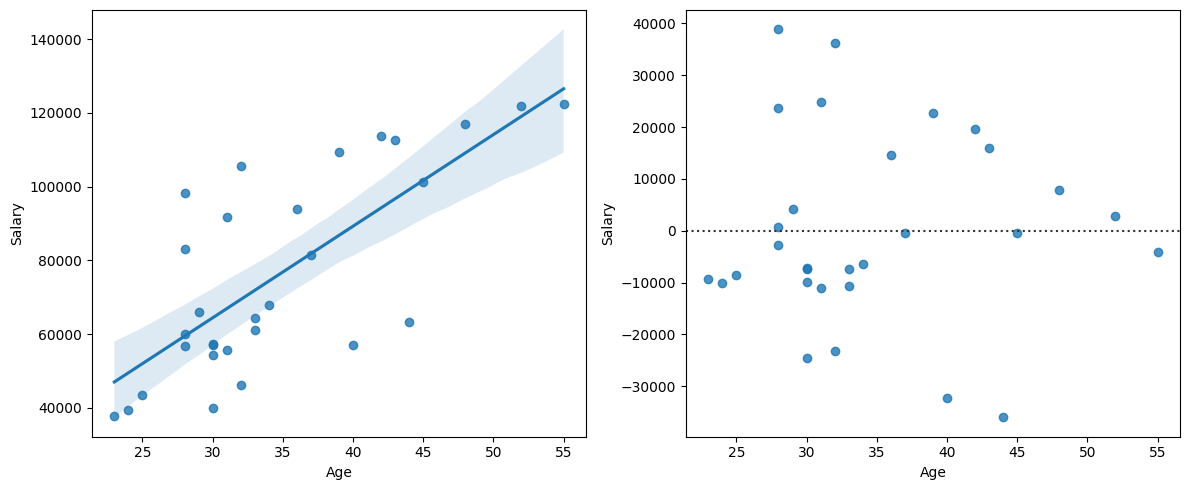

In [64]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.regplot(x=df['Age'], y=df['Salary'])
plt.subplot(122)
sns.residplot(x=df['Age'], y=df['Salary'])

plt.tight_layout()  # Adjust subplot parameters to remove extra space
plt.show()

This relationship is somewhat strong and postive, but not as much as the previous plot. The residuals are relatively randomly spaced. This matches their correlation coefficient of 0.74. Generally anything with a correlation coefficient over 0.8 is considered strong enough to include in a model.

#### RaisePercent vs Salary

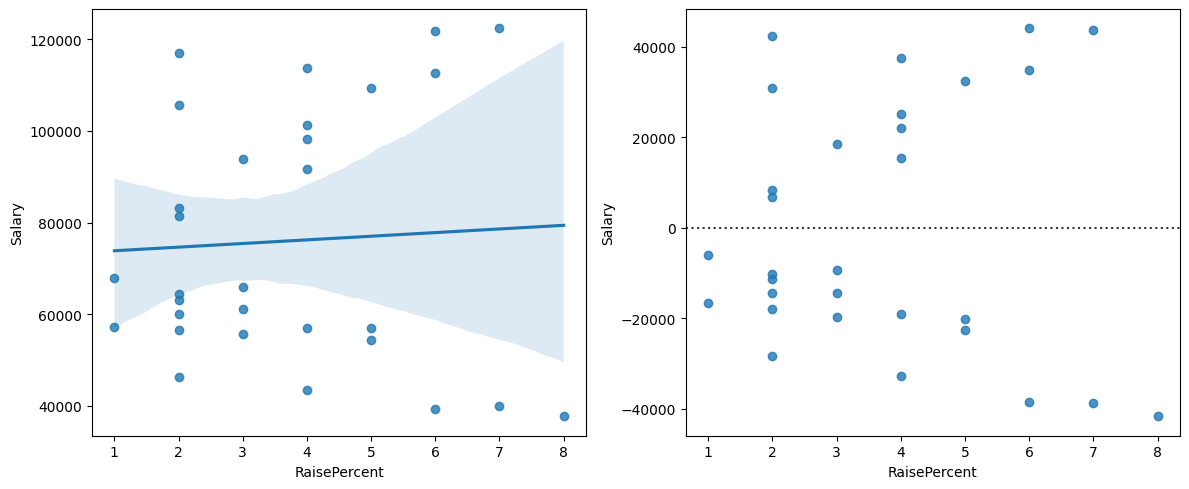

In [65]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.regplot(x=df['RaisePercent'], y=df['Salary'])
plt.subplot(122)
sns.residplot(x=df['RaisePercent'], y=df['Salary'])

plt.tight_layout()  # Adjust subplot parameters to remove extra space
plt.show()

These two factors have a pretty weak linear relationship looking at our graph. This matches with their correlation coefficient of 0.05. Although if we look at the residuals, we can see a sideways parabola. This may indicate these two variables might have a **quadratic relationship** instead. 

#### Badge vs Salary

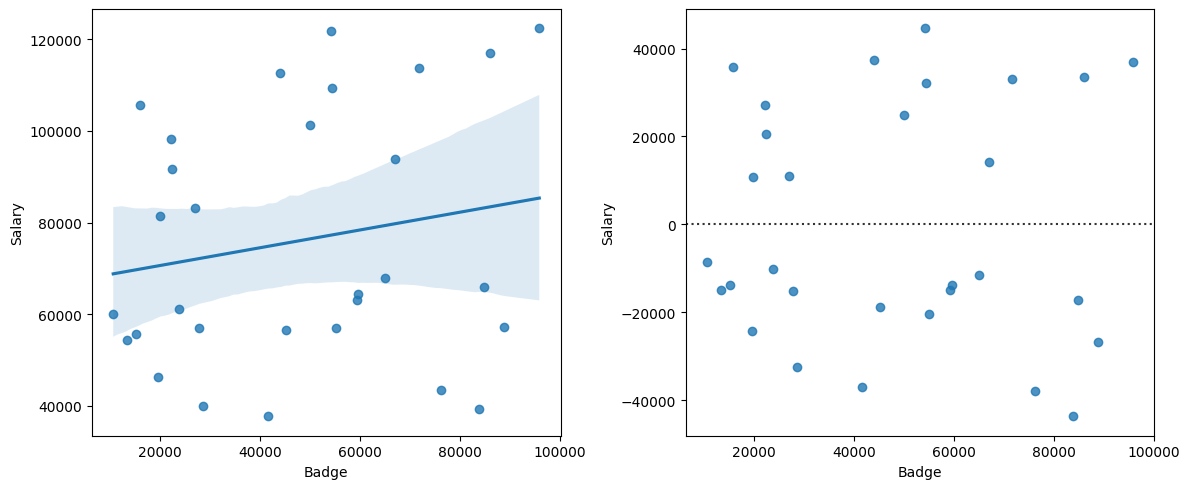

In [66]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.regplot(x=df['Badge'], y=df['Salary'])
plt.subplot(122)
sns.residplot(x=df['Badge'], y=df['Salary'])

plt.tight_layout() 
plt.show()


We can be pretty confident these two variables have little/no relationship. The regression line is pretty far from any of the data points. There is no pattern to the residuals so they probably don't have a **higher order relationship** either.


#### Conclusion
There is strong evidence there is a strong positive correlation between `YearsExperience` and `Salary`. We want to include this variable in our model. 


### Discrete categorical variables

In this dataset we have 2 continuous numerical features which could have an impact on salary:
- `ParkingSpot`: `Y` if they have a parking spot, `N` if they do not
- `SalarySchedule`: The salary table on file by HR

The eaiset way to see a relationship between categorical variables and a result is to create boxplots.

Text(0.5, 1.0, 'Relationship of Salary Table and Salary')

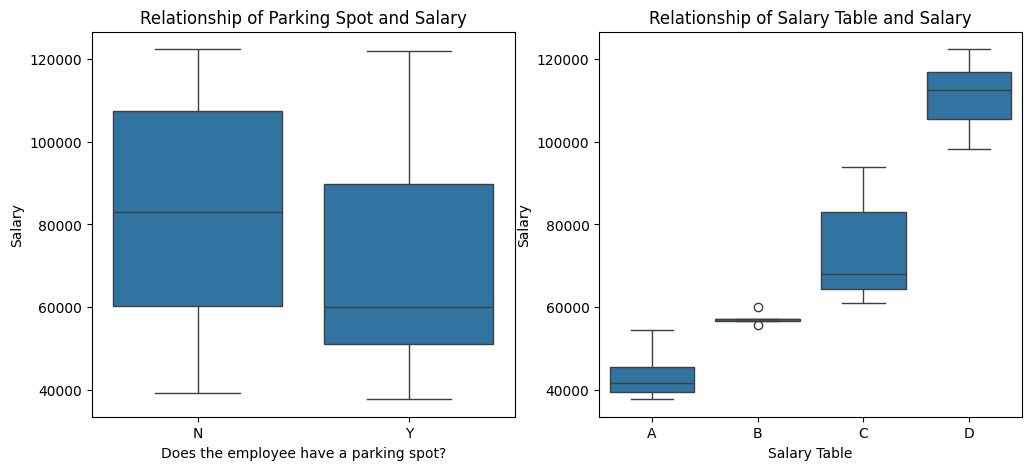

In [67]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.boxplot(x="ParkingSpot", y="Salary", data=df)
plt.xlabel("Does the employee have a parking spot?")
plt.ylabel("Salary")
plt.title("Relationship of Parking Spot and Salary")
plt.subplot(122)
sns.boxplot(x="SalarySchedule", y="Salary", data=df)
plt.xlabel("Salary Table")
plt.ylabel("Salary")
plt.title("Relationship of Salary Table and Salary")

Look at our plots there is no difference in the salaries of employees with parking spots in contrast to those without. The two boxplots cover almost the same range of salaries and have similiar means. In contrast, we can see a huge difference in the salaries of employees who use different tables. They span completely different ranges of values. This is a quick indication that `SalarySchedule` may be a worthwhile feature to include in our model. 

#### ANOVA

One way for use to quantify the relationship between categorical variables and our result is with **Analysis of Variance** or **ANOVA**. The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:
- **F-test score**: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.
- **P-value<**:  P-value tells how statistically significant our calculated score value is.

We will use the same level of significance, 0.05, as before. So we can use the same thresholds to decide what relationships are significant.

If our salary variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.

#### Parking Spot vs Salary
Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.


In [68]:

gp_p=df[['ParkingSpot', 'Salary']].groupby(['ParkingSpot'])

f_val, p_val = stats.f_oneway(gp_p.get_group(('Y',))['Salary'], gp_p.get_group(('N',))['Salary'])  

print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 1.756024373715481 , P = 0.1958337260611577


This test has a low F-test score and a large p-value. Since p > 0.1, there is no relationship between these variables. This makes sense when we think back to our box plots. 

#### Salary Table vs Salary

In [69]:
gp_s=df[['SalarySchedule', 'Salary']].groupby(['SalarySchedule'])

f_val, p_val = stats.f_oneway(gp_s.get_group(('A',))['Salary'], gp_s.get_group(('B',))['Salary'], gp_s.get_group(('C',))['Salary'], gp_s.get_group(('D',))['Salary'])  

print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 81.2688264868993 , P = 2.4674961403453294e-13


This ANOVA test resulted in a much larger F-score and a much lower p-value. Since p < 0.001, there is strong evidence the correlation between `SalarySchedule` and `Salary` is significant. This variable will be valuable to include in our model. 


#### Conclusion
There is strong evidence the correlation between `SalarySchedule` and `Salary` is significant. This variable will be valuable to include in our model. 
